In [1]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
# import functions from modsim

from modsim import *

In [3]:
def make_system(T_init, volume, r, t_end):
    return System(T_init=T_init,
                  T_final=T_init,
                  volume=volume,
                  r=r,
                  t_end=t_end,
                  T_env=22,
                  t_0=0,
                  dt=1)

In [4]:
coffee = make_system(T_init=90, volume=300, r=0.01, t_end=30)

In [5]:
def change_func(t, T, system):
    r, T_env, dt = system.r, system.T_env, system.dt
    return -r * (T - T_env) * dt

In [6]:
change_func(0, coffee.T_init, coffee)

-0.68

In [7]:
def run_simulation(system, change_func):
    t_array = linrange(system.t_0, system.t_end, system.dt)
    n = len(t_array)

    series = TimeSeries(index=t_array)
    series.iloc[0] = system.T_init

    for i in range(n-1):
        t = t_array[i]
        T = series.iloc[i]
        series.iloc[i+1] = T + change_func(t, T, system)

    system.T_final = series.iloc[-1]
    return series

In [8]:
results = run_simulation(coffee, change_func)

In [9]:
show(results.head())

,Quantity
Time,
0.0,90.000000
1.0,89.320000
2.0,88.646800
3.0,87.980332
4.0,87.320529


In [10]:
show(results.tail())

,Quantity
Time,
26.0,74.362934
27.0,73.839305
28.0,73.320912
29.0,72.807702
30.0,72.299625


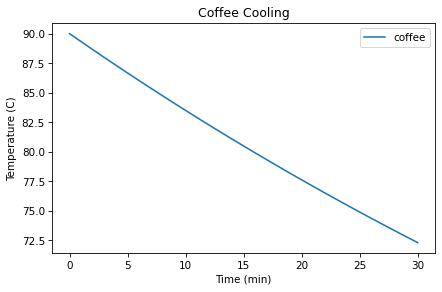

In [11]:
results.plot(label='coffee')

decorate(xlabel='Time (min)',
         ylabel='Temperature (C)',
         title='Coffee Cooling')

In [12]:
coffee.T_final

72.2996253904031

In [13]:
def func(x):
    return (x-1) * (x-2) * (x-3)

In [14]:
res = root_scalar(func, bracket=[1.5, 2.5])
res

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: 2.0

In [15]:
res.root

2.0

In [16]:
res = root_scalar(func, bracket=[2.5, 3.5])
res.root

2.9999771663211003

In [17]:
def error_func(r, system):
    system.r = r
    results = run_simulation(system, change_func)
    return system.T_final - 70

In [18]:
coffee = make_system(T_init=90, volume=300, r=0.01, t_end=30)
error_func(0.01, coffee)

2.2996253904030937

In [19]:
error_func(0.02, coffee)

-10.907066281994297

In [20]:
res = root_scalar(error_func, coffee, bracket=[0.01, 0.02])
res

      converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: 0.011543084190599507

In [21]:
r_coffee = res.root
r_coffee

0.011543084190599507

In [22]:
coffee.r = res.root
run_simulation(coffee, change_func)
coffee.T_final

70.00000057308064

### Exercise 1


In [23]:
milk = make_system(T_init=5, t_end=15, r=0.1, volume=50)
results_milk = run_simulation(milk, change_func)
milk.T_final

18.499850754390966

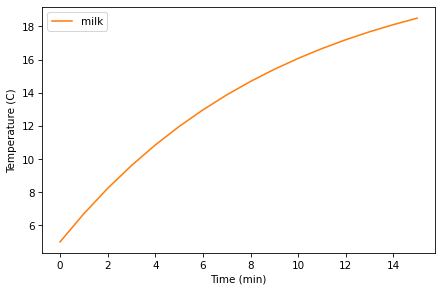

In [24]:
results_milk.plot(color='C1', label='milk')

decorate(xlabel='Time (min)',
         ylabel='Temperature (C)')


### Exercise 2



In [25]:
def error_func2(r, system):
    system.r = r
    results = run_simulation(system, change_func)
    return system.T_final - 20

In [26]:
root_scalar(error_func2, milk, bracket=[0.1, 0.2])
res

      converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: 0.011543084190599507

In [27]:
run_simulation(milk, change_func)
milk.T_final

20.000229743777304